# Lead Scoring Case Study

### Problem Statement:
    X – Education is an online education company sells online courses to industry professionals. The company market the courses on Google and other platforms so many people land on their website and those people express their interest by filling details for desired courses. The company classify these visitors as Leads. The lead conversion rate of turning into customer is presently 30% and the company wants to target the leads accordingly to get 80% conversion rate. The company sourced the dataset of the past activities who got converted into customers and who did not. The main goal from this dataset is to find the potential leads which can get converted by building a model from this dataset.

In [69]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows',200)
pd.set_option('float_format', '{:f}'.format)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Data Sourcing and Exploration

In [70]:
#Importing the dataset
lead = pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.000000,0,0.000000,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.000000,15.000000,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.000000,674,2.500000,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.000000,15.000000,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.000000,1532,2.000000,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.000000,20.000000,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.000000,305,1.000000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.000000,17.000000,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.000000,1428,1.000000,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.000000,18.000000,No,No,Modified


In [71]:
#Getting shape and info of the data
print(lead.shape)
print()
print(lead.info())

(9240, 37)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                            

In [72]:
#Exploring numerical parameters of data
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning

Many columns contain value **`SELECT`**, which is nothing but the unselected from the drop-down menu where initially this option appears. Eventually, this value can be treated as null value.

In [73]:
#Let's replace the SELECT value with null value
lead = lead.replace('Select',np.nan)

#### Dropping columns based on percenatage of missing values

In [74]:
#Checking the columns percentage of missing values
round(100*(lead.isnull().sum()/len(lead)),2)

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.390000
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.480000
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.480000
Last Activity                                    1.110000
Country                                         26.630000
Specialization                                  36.580000
How did you hear about X Education              78.460000
What is your current occupation                 29.110000
What matters most to you in choosing a course   29.320000
Search                                           0.000000
Magazine      

Let's drop columns with more than **`30%`** missing values

In [75]:
#Dropping the columns with more than 30% missing values

missing = round(100*(lead.isnull().sum()/len(lead.index)),2)
missing_col = missing[missing > 30].index
lead = lead.drop(missing_col,axis=1)

In [76]:
(lead.isnull().sum().sort_values(ascending=False)/len(lead.index))*100

What matters most to you in choosing a course   29.318182
What is your current occupation                 29.112554
Country                                         26.634199
TotalVisits                                      1.482684
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Lead Source                                      0.389610
Lead Number                                      0.000000
Lead Origin                                      0.000000
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
Total Time Spent on Website                      0.000000
Last Notable Activity                            0.000000
A free copy of Mastering The Interview           0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Arti

In [77]:
#Getiing the value counts of top 3 columns having missing values
print(lead['What matters most to you in choosing a course'].value_counts())
print()
print(lead['What is your current occupation'].value_counts())
print()
print(lead['Country'].value_counts())

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Canada                     4
Kuwait                     4
Sweden                     3
Asia/Pacific Region        2
China                   

- **`What matters most to you in choosing a course`** is highly skewed column toward `Better Career Prospects` and contains `29.31%` missing values. Also imputing the missing values with the mode value `Better Career Prospects` will make it highly skewed. So we can drop that column instead.
- **`Country`** column could not help in the lead score context because the `X Education` is an online learning platform. Lead's country won't matter as this course can be done at any part of the world provided with internet connection. 
- **`What is your current occupation`** is an important variable for finding the leads as course is designed for industry professionals. We will impute the missing values as **`Unknown`** 

In [78]:
#Dropping columns from the dataset
lead = lead.drop(['What matters most to you in choosing a course','Country'],axis=1)

#Replacing the missing values as Unknown for What is your current occupation
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan,'Unknown')


In [79]:
(lead.isnull().sum().sort_values(ascending=False)/len(lead.index))*100
rows_before = len(lead.index)

In [80]:
# As missing value % is very less, let's drop the rows with missing values.
# Dropping all rows containing missing value
lead.dropna(inplace=True)

In [81]:
#Lets ensure again , all missing values are removed
(lead.isnull().sum().sort_values(ascending=False)/len(lead.index))*100
rows_after = len(lead.index)

In [82]:
#Check how much data we lost 
print("% of data lost after removing rows with null values :{0} ",format(100*(rows_before - rows_after)/rows_before))

% of data lost after removing rows with null values :{0}  1.7965367965367964


In [83]:
#Checking the shape
lead.shape

(9074, 25)

#### Dropping columns based on unique values

In [84]:
lead.nunique()

Prospect ID                                 9074
Lead Number                                 9074
Lead Origin                                    4
Lead Source                                   21
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1717
Page Views Per Visit                         114
Last Activity                                 17
What is your current occupation                7
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates About Our Courses         1
Update me on Supply 

We have `Prospect ID` and `Lead Number` columns having all values unique as these won't help for our analysis.

In [85]:
#Let's drop Prospect ID and Lead Number columns
lead = lead.drop(['Prospect ID','Lead Number'],axis=1)

We also have some columns with unique value as 1 which will not give much information. These are nothing but the dummy columns which can be removed instantly.

In [86]:
#Getting columns with unique value as 1
un_col = lead.nunique()
un_col = un_col[un_col == 1]
un_col = un_col.index.values
un_col

array(['Magazine', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'], dtype=object)

In [87]:
#Dropping columns with unique valiue as 1
lead.drop(columns=un_col,axis=1,inplace=True)

In [88]:
lead.shape

(9074, 18)

### Outlier Treatment

In [89]:
num_columns = lead.dtypes[lead.dtypes !='object'].index
num_columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

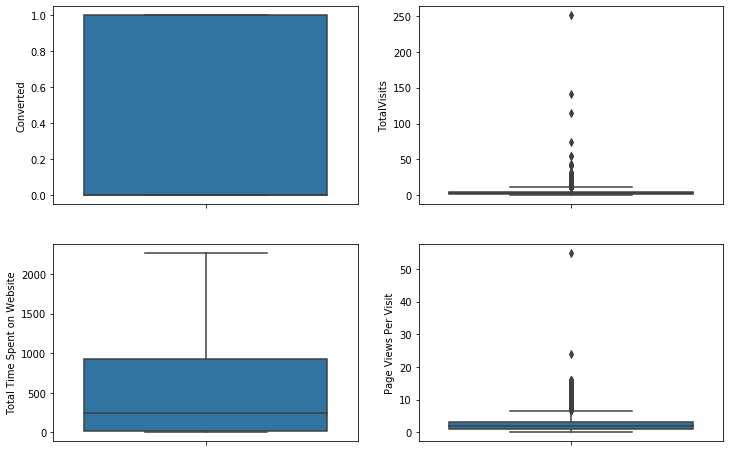

In [90]:
plt.figure(figsize=(12,8))
for i,col in enumerate(num_columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=col,data=lead)

Outliers are present in `TotalVisits` and `Page Views Per Visit`. Let's remove the outliers through IQR method

In [91]:
#For TotalVisits
Q3 = lead['TotalVisits'].quantile(0.75)
Q1 = lead['TotalVisits'].quantile(0.25)
IQR = Q3 - Q1
lead = lead[(lead['TotalVisits'] >= Q1 - 1.5 * IQR) & (lead['TotalVisits'] <= Q3 + 1.5 * IQR) ]

#For Page Views Per Visit
Q3 = lead['Page Views Per Visit'].quantile(0.75)
Q1 = lead['Page Views Per Visit'].quantile(0.25)
IQR = Q3 - Q1
lead = lead[(lead['Page Views Per Visit'] >= Q1 - 1.5 * IQR) & (lead['Page Views Per Visit'] <= Q3 + 1.5 * IQR) ]


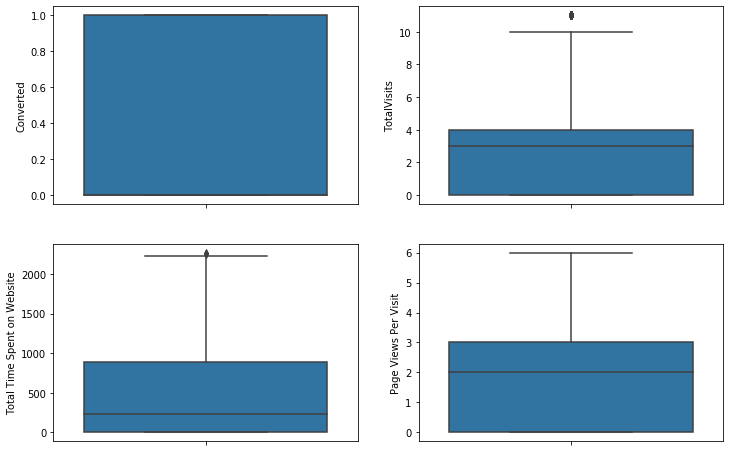

In [92]:
#Lets check distribution for numerical columns again after outlier treatment
plt.figure(figsize=(12,8))
for i,col in enumerate(num_columns):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=col,data=lead)

In [93]:
lead.shape

(8513, 18)

## Data Visualisation

### Univariate Analysis

In [94]:
#Getting all categorical columns
cat_columns = lead.dtypes[lead.dtypes =='object'].index
print(len(cat_columns))
print()
print(cat_columns)

14

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'What is your current occupation', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


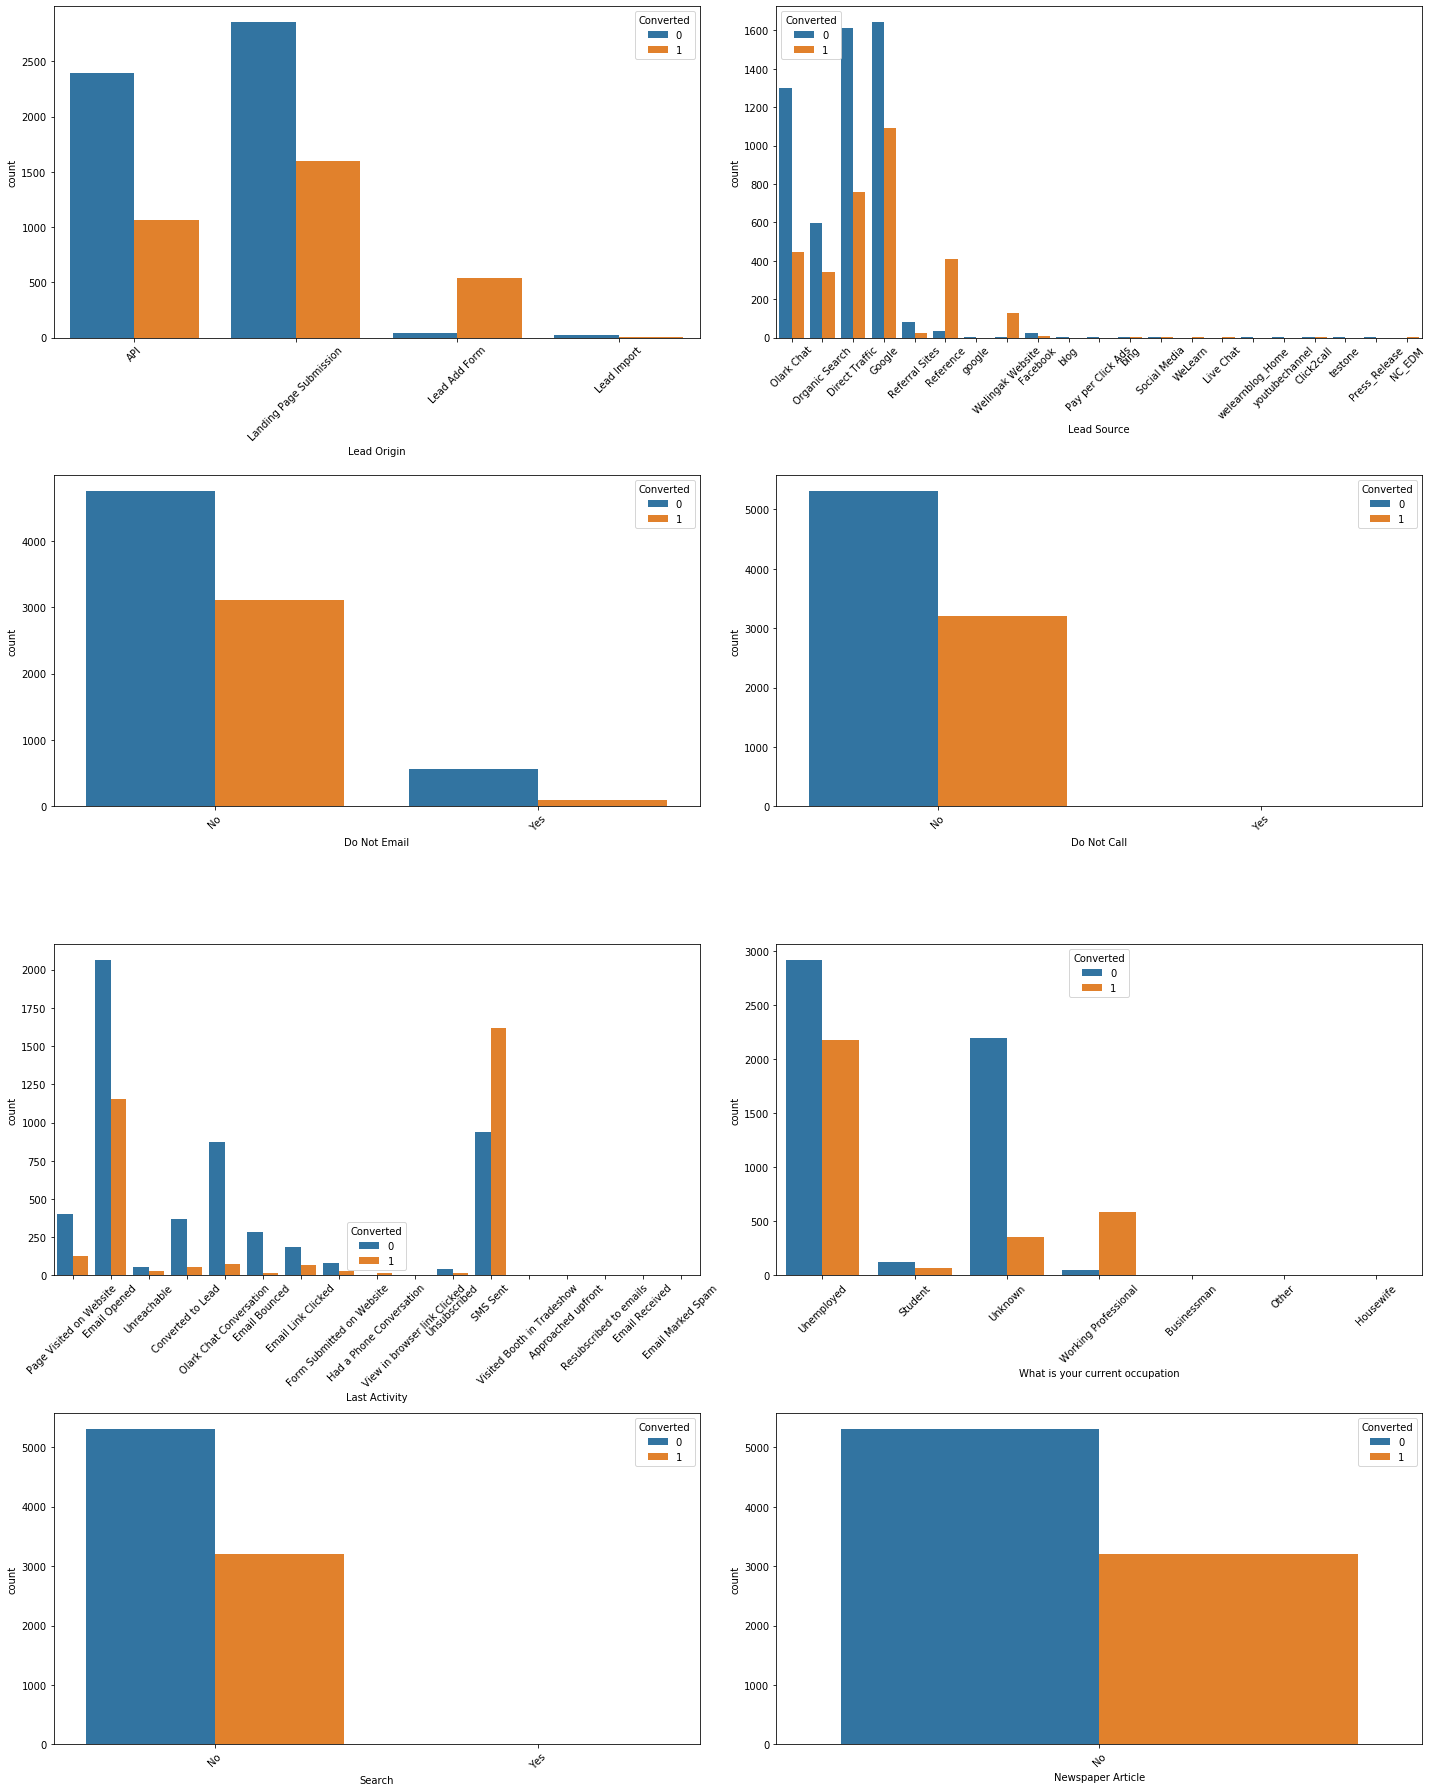

In [95]:
#Plotting countplot of first 8 categorical columns
plt.figure(figsize=(20,25))
for i,col in enumerate(cat_columns[0:8]):
    plt.subplot(4,2,i+1)
    sns.countplot(x=col,data = lead, hue='Converted')
    plt.xticks(rotation=45)
    plt.tight_layout()

- __`Lead Origin`__ column has Lead Add Form value which has more potential of lead getting converted 
- In __`Lead Source`__ column, Reference has proven to be the most influential to be getting converted. Out of 534, 490 are converted successfully.
- There is nothing significant information in columns such as __`Do Not Email, Do Not Call, Search and Newspaper Article`__ because all the information is skewed towards only one value ('NO')
- Most leads are getting converted after the `SMS is sent` as shown in Last Activity
- `Working Professional` can be the target occupation that has very high potential of getting converted

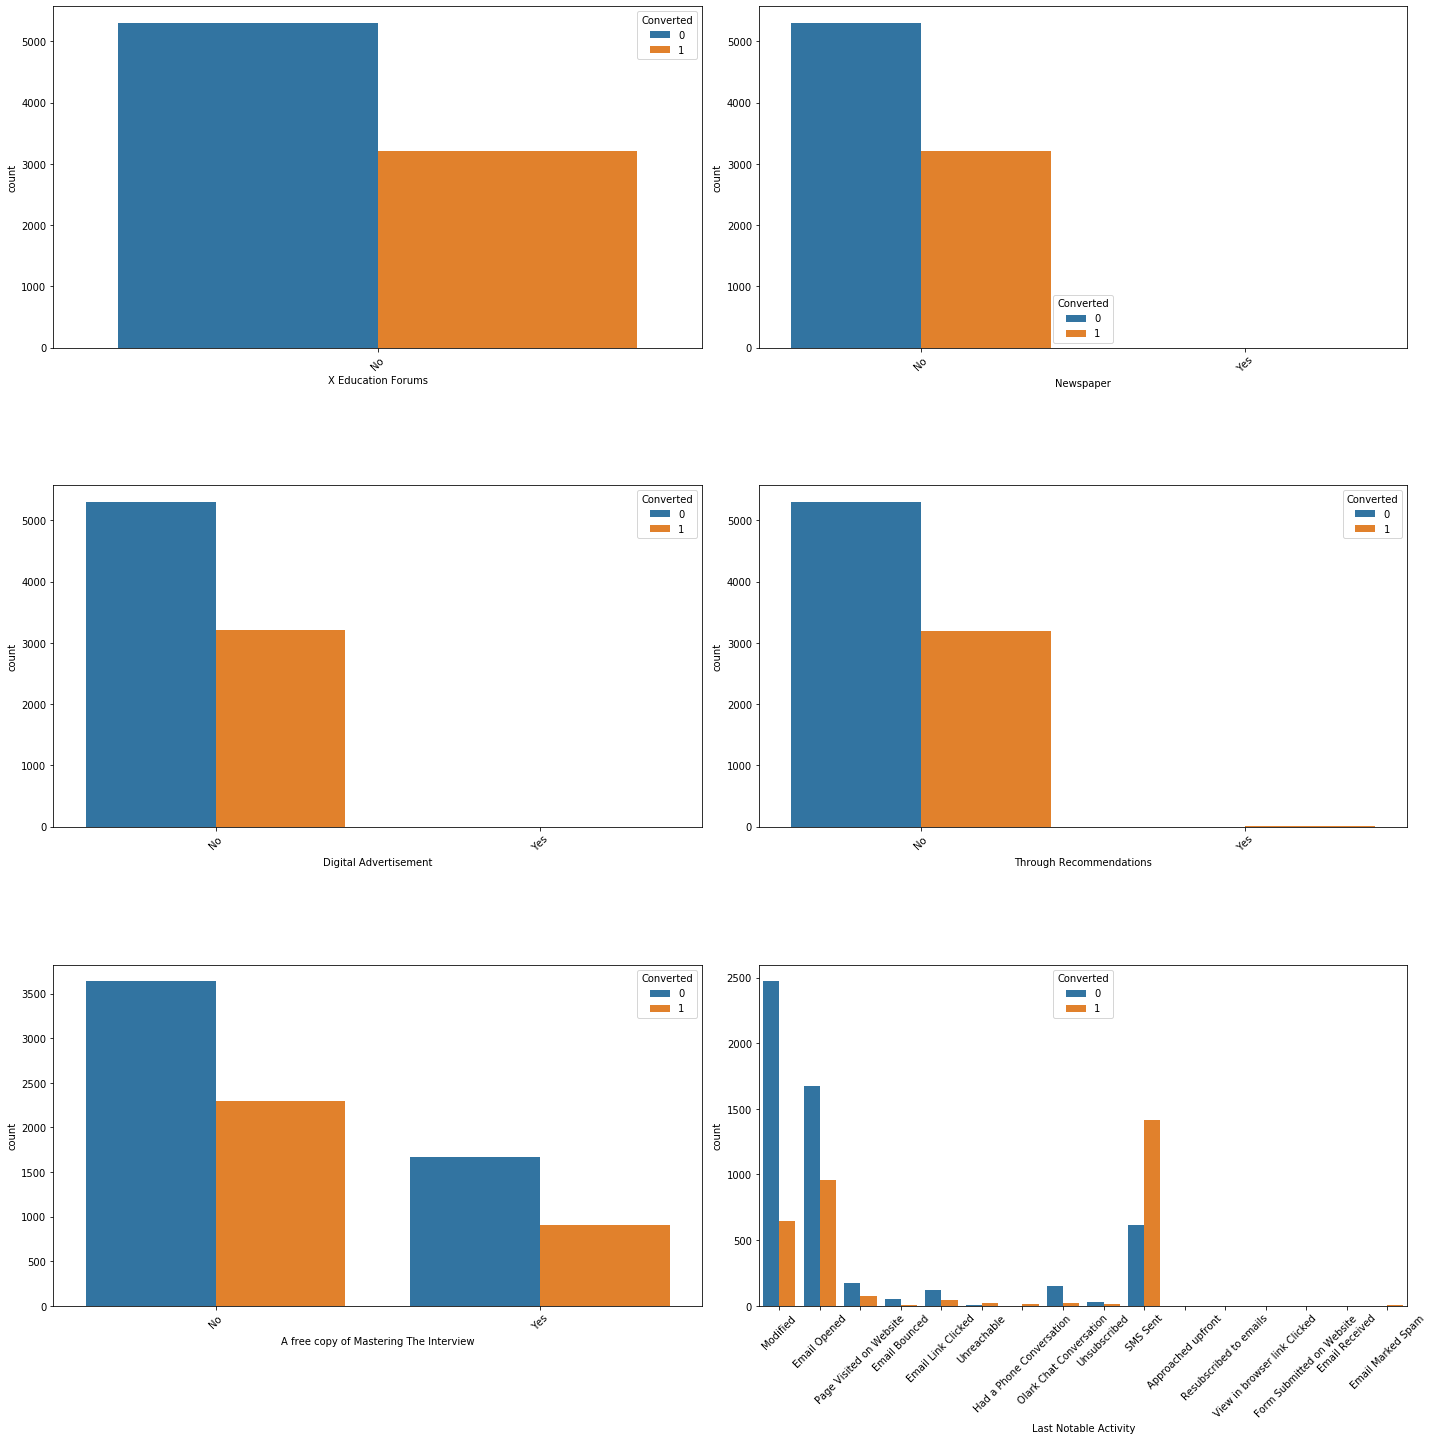

In [96]:
#Plotting countplot of remaining categorical columns
plt.figure(figsize=(20,25))
for i,col in enumerate(cat_columns[8:]):
    plt.subplot(4,2,i+1)
    sns.countplot(x=col,data = lead, hue='Converted')
    plt.xticks(rotation=45)
    plt.tight_layout()

- Again, there is nothing significant information in columns such as __`X Education Forums, Newspaper, Digital Advertisement and Through Reccomendations`__ because all the information is skewed towards only one value ('NO')
- Again, `SMS Sent` has shown more potential in lead conversion 

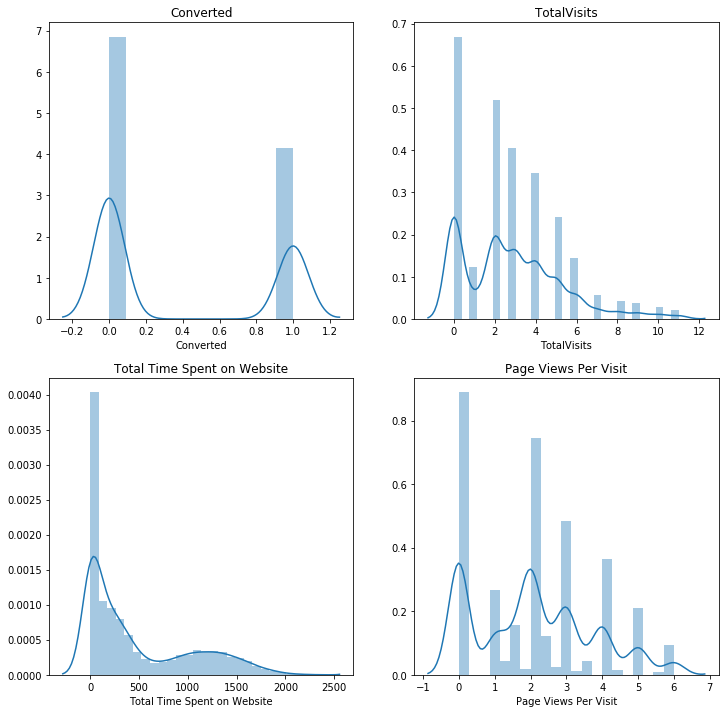

In [97]:
#Plotting distribution plot of all numerical columns
plt.figure(figsize=(12,12))
for i,col in enumerate(num_columns):
    plt.subplot(2,2,i+1)
    sns.distplot(lead[col]).set(title=col)
    

From the above plots,
- Leads have mostly visited the platform once or twice
- Leads have highly spent 50-100 seconds on the platform
- Most of the leads have visited only first page followed by two pages

### Bivariate Analysis

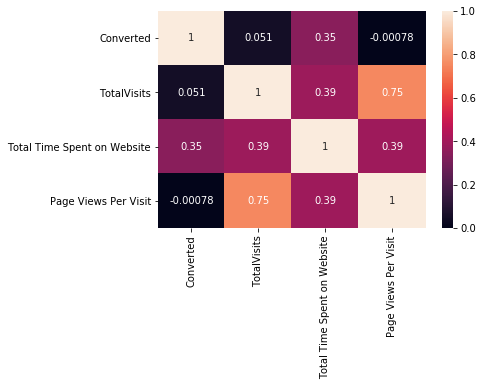

In [98]:
#Checking the correlation values
sns.heatmap(lead.corr(), annot = True)

Correlation map shows less correlations between variables except there is high correlation between `TotalVisits` and `Page Views Per Visit` which will be treated during VIF feature elimination

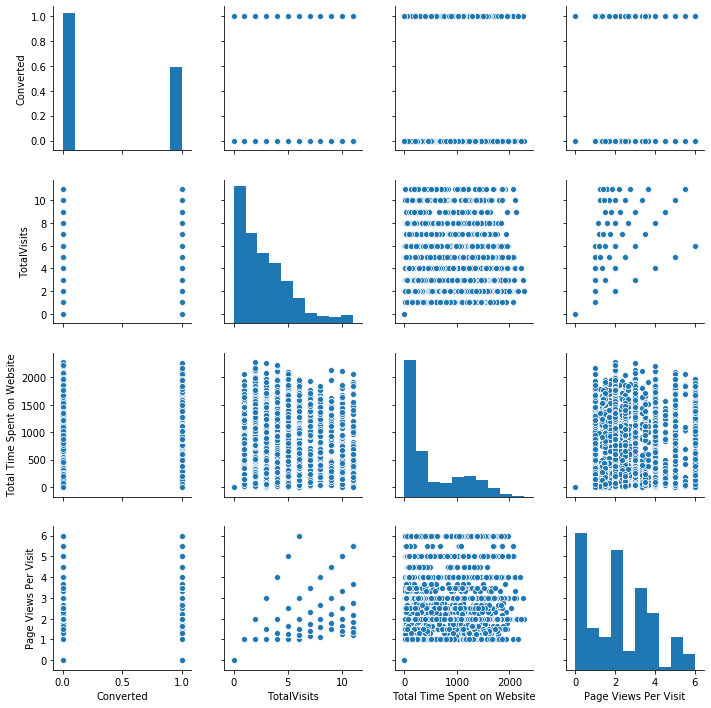

In [99]:
sns.pairplot(lead)

There is no visible pattern between any variables

## Dummy Variables Creation

In [100]:
#Creating dummies for all categorical columns
lead1 = pd.get_dummies(lead, drop_first = True)
lead1.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Search_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.000000,0,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.000000,674,2.500000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.000000,1532,2.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.000000,305,1.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.000000,1428,1.000000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [101]:
lead1.shape

(8513, 71)

### Train - Test Split

In [102]:
#Separating the target column
y = lead1.pop('Converted')
X = lead1

In [103]:
#Removing Converted from numerical columns list
num_columns = num_columns.drop('Converted')
num_columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

In [104]:
#Splitting the dataset in 70-30 ratio into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [105]:
X_train.shape

(5959, 70)

In [106]:
X_test.shape

(2554, 70)

### Feature Scaling

In [107]:
#Scaling the numerical data using Min-Max Scaler
scaler = MinMaxScaler()

X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Search_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6623,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2792,0.181818,0.054137,0.333333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6034,0.272727,0.128081,0.500000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9166,0.363636,0.058099,0.221667,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2705,0.181818,0.657570,0.333333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [108]:
#Checking the present lead conversion rate
convert = (sum(lead['Converted'])/len(lead['Converted'].index))*100
convert

37.66004933630918

- Present lead conversion rate is 37.66%

## Model Building

#### Running First Training Model

In [109]:
#Model 1
X_train_sm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
X_train_sm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5892
Model Family:                Binomial   Df Model:                           66
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 06 Jan 2020   Deviance:                          nan
Time:                        17:22:01   Pearson chi2:                 6.69e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -2.331e+15   8.63e+07   -2.7e+07      0.000   -2.33e+15   -2.33e+15
TotalVisits                                           1.242e+15   6.47e+06   1.92e+08      0.000    1.24e+15    1.24e+15
Total Time Spent on Website                           3.678e+15   4.29e+06   8.57e+08      0.000    3.68e+15    3.68e+15
Page Views Per Visit                                 -6.175e+14   5.81e+06  -1.06e+08      0.000   -6.18e+14   -6.18e+14
Lead Origin_Landing Page Submission                  -6.748e+13   2.83e+06  -2.39e+07      0.000   -6.75e+13   -6.75e+13
Lead Origin_Lead Add Form                            -5.628e+14   3.88e+07  -1.45e+07      0.000   -5.63e+14   -5.63e+14
Lead Origin_Lead Import                               2.781e+15   6.91e+07   4.02e+07      0.000    2.78e+15    2.78e+15
Lead Source_Direct Traffic                            2.753e+15   7.77e+07   3.54e+07      0.000    2.75e+15    2.75e+15
Lead Source_Facebook                                  2.037e+14   1.03e+08   1.98e+06      0.000    2.04e+14    2.04e+14
Lead Source_Google                                    2.977e+15   7.77e+07   3.83e+07      0.000    2.98e+15    2.98e+15
Lead Source_Live Chat                                 9.721e+15    9.5e+07   1.02e+08      0.000    9.72e+15    9.72e+15
Lead Source_NC_EDM                                    7.339e+15   1.03e+08   7.14e+07      0.000    7.34e+15    7.34e+15
Lead Source_Olark Chat                                3.856e+15   7.76e+07   4.97e+07      0.000    3.86e+15    3.86e+15
Lead Source_Organic Search                            2.771e+15   7.77e+07   3.57e+07      0.000    2.77e+15    2.77e+15
Lead Source_Pay per Click Ads                        -8.658e+14   1.03e+08  -8.43e+06      0.000   -8.66e+14   -8.66e+14
Lead Source_Press_Release                            -9.823e+14   1.03e+08  -9.54e+06      0.000   -9.82e+14   -9.82e+14
Lead Source_Reference                                 5.471e+15   6.73e+07   8.13e+07      0.000    5.47e+15    5.47e+15
Lead Source_Referral Sites                            2.628e+15   7.81e+07   3.37e+07      0.000    2.63e+15    2.63e+15
Lead Source_Social Media                              7.148e+15   1.03e+08   6.96e+07      0.000    7.15e+15    7.15e+15
Lead Source_WeLearn                                   6.458e+15   1.03e+08   6.29e+07      0.000    6.46e+15    6.46e+15
Lead Source_Welingak Website                           6.63e+15   6.76e+07   9.81e+07      0.000    6.63e+15    6.63e+15
Lead Source_bing                                      3.993e+15   8.46e+07   4.72e+07      0.000    3.99e+15    3.99e+15
Lead Source_blog                                     -1.11

It is highly inconvenient to iterate the features individually. Let's use RFE to get __`15`__ best features

### Feature Selection Using RFE

In [110]:
#Import Library required 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

In [111]:
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [112]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False, False,  True,
        True,  True, False, False, False, False, False])

In [113]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_Landing Page Submission', False, 40),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 25),
 ('Lead Source_Direct Traffic', False, 17),
 ('Lead Source_Facebook', False, 41),
 ('Lead Source_Google', False, 20),
 ('Lead Source_Live Chat', False, 47),
 ('Lead Source_NC_EDM', False, 24),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 19),
 ('Lead Source_Pay per Click Ads', False, 35),
 ('Lead Source_Press_Release', False, 50),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 16),
 ('Lead Source_Social Media', False, 9),
 ('Lead Source_WeLearn', False, 32),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 51),
 ('Lead Source_blog', False, 38),
 ('Lead Source_google', False, 18),
 ('Lead Source_testone', False, 30),
 ('Lead Source_welearnblog_Home', False, 43),
 (

In [114]:
col_rfe = X_train.columns[rfe.support_]

In [115]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Do Not Call_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails'

##### Assessing the model with StatsModels

In [116]:
#Model 2
X_train_sm = sm.add_constant(X_train[col_rfe])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5943
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2419.0
Date:                Mon, 06 Jan 2020   Deviance:                       4837.9
Time:                        17:22:05   Pearson chi2:                 6.36e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7971      0.086     -9.292      0.000      -0.965      -0.629
Total Time Spent on Website                              4.8126      0.177     27.145      0.000       4.465       5.160
Lead Origin_Lead Add Form                                1.7846      1.076      1.659      0.097      -0.324       3.893
Lead Source_Olark Chat                                   1.2816      0.106     12.050      0.000       1.073       1.490
Lead Source_Reference                                    2.6940      1.107      2.435      0.015       0.525       4.863
Lead Source_Welingak Website                             4.9337      1.479      3.336      0.001       2.035       7.832
Do Not Email_Yes                                        -1.8909      0.181    -10.433      0.000      -2.246      -1.536
Last Activity_Had a Phone Conversation                   2.4382      1.083      2.252      0.024       0.316       4.561
Last Activity_Olark Chat Conversation                   -1.1382      0.199     -5.731      0.000      -1.527      -0.749
What is your current occupation_Housewife               23.0676   1.44e+04      0.002      0.999   -2.83e+04    2.83e+04
What is your current occupation_Working Professional     2.7702      0.191     14.481      0.000       2.395       3.145
Last Notable Activity_Email Link Clicked                -2.1180      0.288     -7.348      0.000      -2.683      -1.553
Last Notable Activity_Email Opened                      -1.5343      0.092    -16.702      0.000      -1.714      -1.354
Last Notable Activity_Modified                          -2.0524      0.102    -20.090      0.000      -2.253      -1.852
Last Notable Activity_Olark Chat Conversation           -1.7728      0.371     -4.784      0.000      -2.499      -1.047
Last Notable Activity_Page Visited on Website           -1.6106      0.217     -7.415      0.000      -2.036      -1.185
========================================================================================================================
"""

Lead Origin_Lead Add Form and What is your current occupation_Housewife have high p value ( greater than 0.05) which make them insignificant.We should remove them. 

In [117]:
#lets check VIF and then drop 1 by 1

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [118]:
X_train_sm = X_train_sm.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,78.120000
3,Lead Source_Reference,60.800000
4,Lead Source_Welingak Website,18.430000
7,Last Activity_Olark Chat Conversation,1.980000
12,Last Notable Activity_Modified,1.740000
2,Lead Source_Olark Chat,1.600000
0,Total Time Spent on Website,1.550000
11,Last Notable Activity_Email Opened,1.370000
13,Last Notable Activity_Olark Chat Conversation,1.350000
9,What is your current occupation_Working Profes...,1.170000


Lets remove Lead Origin_Lead Add Form first 

In [119]:
X_train_sm = X_train_sm.drop(["Lead Origin_Lead Add Form"], axis = 1)

In [120]:
# model 3

#Build model again

X_train_sm = sm.add_constant(X_train_sm)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5944
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2420.3
Date:                Mon, 06 Jan 2020   Deviance:                       4840.6
Time:                        17:22:06   Pearson chi2:                 6.36e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7936      0.086     -9.260      0.000      -0.962      -0.626
Total Time Spent on Website                              4.8060      0.177     27.142      0.000       4.459       5.153
Lead Source_Olark Chat                                   1.2818      0.106     12.065      0.000       1.074       1.490
Lead Source_Reference                                    4.4749      0.272     16.477      0.000       3.943       5.007
Lead Source_Welingak Website                             6.7149      1.018      6.598      0.000       4.720       8.710
Do Not Email_Yes                                        -1.8923      0.181    -10.443      0.000      -2.247      -1.537
Last Activity_Had a Phone Conversation                   2.4359      1.083      2.250      0.024       0.314       4.558
Last Activity_Olark Chat Conversation                   -1.1415      0.199     -5.750      0.000      -1.531      -0.752
What is your current occupation_Housewife               23.0651   1.44e+04      0.002      0.999   -2.83e+04    2.83e+04
What is your current occupation_Working Professional     2.7679      0.191     14.472      0.000       2.393       3.143
Last Notable Activity_Email Link Clicked                -2.1200      0.288     -7.357      0.000      -2.685      -1.555
Last Notable Activity_Email Opened                      -1.5335      0.092    -16.698      0.000      -1.714      -1.354
Last Notable Activity_Modified                          -2.0518      0.102    -20.091      0.000      -2.252      -1.852
Last Notable Activity_Olark Chat Conversation           -1.7714      0.370     -4.782      0.000      -2.497      -1.045
Last Notable Activity_Page Visited on Website           -1.6119      0.217     -7.424      0.000      -2.038      -1.186
========================================================================================================================
"""

In [121]:
# What is your current occupation_Housewife  have quite high p value, lets remove it too

X_train_sm = X_train_sm.drop(["What is your current occupation_Housewife"], axis = 1)

# build model again 
#Model 4

X_train_sm = sm.add_constant(X_train_sm)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5945
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2426.9
Date:                Mon, 06 Jan 2020   Deviance:                       4853.8
Time:                        17:22:06   Pearson chi2:                 6.38e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7914      0.086     -9.241      0.000      -0.959      -0.624
Total Time Spent on Website                              4.8021      0.177     27.166      0.000       4.456       5.149
Lead Source_Olark Chat                                   1.2755      0.106     12.021      0.000       1.068       1.483
Lead Source_Reference                                    4.4953      0.271     16.579      0.000       3.964       5.027
Lead Source_Welingak Website                             6.7074      1.018      6.590      0.000       4.713       8.702
Do Not Email_Yes                                        -1.8951      0.181    -10.461      0.000      -2.250      -1.540
Last Activity_Had a Phone Conversation                   2.4275      1.082      2.243      0.025       0.306       4.549
Last Activity_Olark Chat Conversation                   -1.1476      0.198     -5.784      0.000      -1.536      -0.759
What is your current occupation_Working Professional     2.7616      0.191     14.442      0.000       2.387       3.136
Last Notable Activity_Email Link Clicked                -2.1065      0.286     -7.364      0.000      -2.667      -1.546
Last Notable Activity_Email Opened                      -1.5278      0.092    -16.651      0.000      -1.708      -1.348
Last Notable Activity_Modified                          -2.0428      0.102    -20.039      0.000      -2.243      -1.843
Last Notable Activity_Olark Chat Conversation           -1.7627      0.370     -4.759      0.000      -2.489      -1.037
Last Notable Activity_Page Visited on Website           -1.6121      0.217     -7.425      0.000      -2.038      -1.187
========================================================================================================================
"""

It looks good now , all features seems signifcant now, p value leass than 0.05

In [122]:
#Lets see VIF of the model

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.090000
11,Last Notable Activity_Modified,1.800000
7,Last Activity_Olark Chat Conversation,1.760000
10,Last Notable Activity_Email Opened,1.600000
2,Lead Source_Olark Chat,1.480000
12,Last Notable Activity_Olark Chat Conversation,1.370000
1,Total Time Spent on Website,1.330000
3,Lead Source_Reference,1.160000
8,What is your current occupation_Working Profes...,1.100000
13,Last Notable Activity_Page Visited on Website,1.090000


All variables have a good value of VIF(VIF value leass than 2). So we need not drop any more variables and we can proceed with making predictions using this model only

In [123]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6623   0.062603
2792   0.070816
6034   0.098045
9166   0.374634
2705   0.914224
7412   0.910806
3055   0.863702
7652   0.993696
4151   0.854495
640    0.143843
dtype: float64

In [124]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0626034 , 0.07081632, 0.09804549, 0.37463392, 0.91422367,
       0.91080612, 0.86370235, 0.99369632, 0.85449468, 0.14384299])

##### Creating a dataframe with the actual Converted column values and the predicted probabilities

In [125]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.062603,6623
1,0,0.070816,2792
2,0,0.098045,6034
3,0,0.374634,9166
4,1,0.914224,2705


### Plotting the ROC Curve

In [130]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [131]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

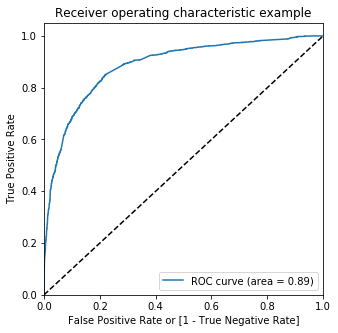

In [132]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

In [133]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.062603,6623,0,1,0,0,0,0,0,0,0,0,0
1,0,0.070816,2792,0,1,0,0,0,0,0,0,0,0,0
2,0,0.098045,6034,0,1,0,0,0,0,0,0,0,0,0
3,0,0.374634,9166,0,1,1,1,1,0,0,0,0,0,0
4,1,0.914224,2705,1,1,1,1,1,1,1,1,1,1,1


In [134]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

             prob  accuracy    sensi    speci
0.000000 0.000000  0.376238 1.000000 0.000000
0.100000 0.100000  0.611176 0.962087 0.399516
0.200000 0.200000  0.768753 0.900089 0.689535
0.300000 0.300000  0.807350 0.839875 0.787732
0.400000 0.400000  0.815237 0.770294 0.842346
0.500000 0.500000  0.819265 0.701160 0.890503
0.600000 0.600000  0.813559 0.632917 0.922518
0.700000 0.700000  0.786541 0.507136 0.955071
0.800000 0.800000  0.768921 0.429527 0.973635
0.900000 0.900000  0.718745 0.270740 0.988970


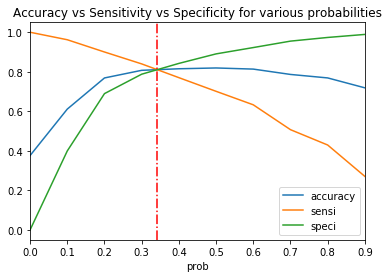

In [135]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(0.34,linestyle='-.',color='r')
plt.title('Accuracy vs Sensitivity vs Specificity for various probabilities')
plt.show()


From the curve above, 0.34 is the optimum point to take it as a cutoff probability.

In [136]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.062603,6623,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.070816,2792,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.098045,6034,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.374634,9166,0,1,1,1,1,0,0,0,0,0,0,1
4,1,0.914224,2705,1,1,1,1,1,1,1,1,1,1,1,1


In [137]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3009,  708],
       [ 416, 1826]], dtype=int64)

In [138]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [139]:
print("Statistics for model at cutoff value for Converted_prob > 0.34")
print("")
# Let's check the overall accuracy.
print('Overall_Accuaracy :{0}'.format(round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),2)))

sensitivity = round(TP / float(TP+FN),2)
# Let's see the sensitivity of our logistic regression model
print('Sensitivity :{0}'.format(sensitivity))

specificity = round(TN / float(TN+FP),2)

# Let us calculate specificity
print('Specificity : {0}'.format(specificity))

# Calculate false postive rate - predicting lead when customer does not convert
print('False positive rate : {0}'.format(round(FP/ float(TN+FP),2)))

precision = round(TP / float(TP+FP),2)
# positive predictive value (Precision)
print ('Precision(Positive predictive Value) : {0}'.format(precision))

# Negative predictive value
print ('Negative predictive Value : {0}'.format(round(TN / float(TN+ FN),2)))

print("")

print("Sensitivity - Specificity : {0} , {1}".format(sensitivity,specificity))

print("Precision - Recall : {0} , {1}".format(precision,sensitivity))

print("F1 score is : {0} ".format(2*(precision*sensitivity)/(precision+sensitivity)))


Statistics for model at cutoff value for Converted_prob > 0.34

Overall_Accuaracy :0.81
Sensitivity :0.81
Specificity : 0.81
False positive rate : 0.19
Precision(Positive predictive Value) : 0.72
Negative predictive Value : 0.88

Sensitivity - Specificity : 0.81 , 0.81
Precision - Recall : 0.72 , 0.81
F1 score is : 0.7623529411764707 


### Precision and Recall View

In [140]:
#Precision and recall tradeoff

from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       1
 5       1
 6       1
 7       1
 8       1
 9       0
 10      1
 11      0
 12      1
 13      0
 14      0
 15      0
 16      0
 17      0
 18      0
 19      0
 20      0
 21      0
 22      1
 23      0
 24      0
 25      1
 26      0
 27      1
 28      1
 29      1
 30      1
 31      0
 32      1
 33      0
 34      1
 35      0
 36      0
 37      1
 38      0
 39      0
 40      0
 41      0
 42      0
 43      1
 44      1
 45      0
 46      0
 47      0
 48      0
 49      1
 50      0
 51      1
 52      0
 53      1
 54      0
 55      1
 56      1
 57      1
 58      0
 59      1
 60      0
 61      1
 62      1
 63      0
 64      1
 65      0
 66      0
 67      1
 68      0
 69      0
 70      1
 71      1
 72      1
 73      0
 74      1
 75      0
 76      1
 77      0
 78      1
 79      0
 80      0
 81      0
 82      0
 83      0
 84      0
 85      1
 86      1
 87      0
 88      0
 89      0
 90      1

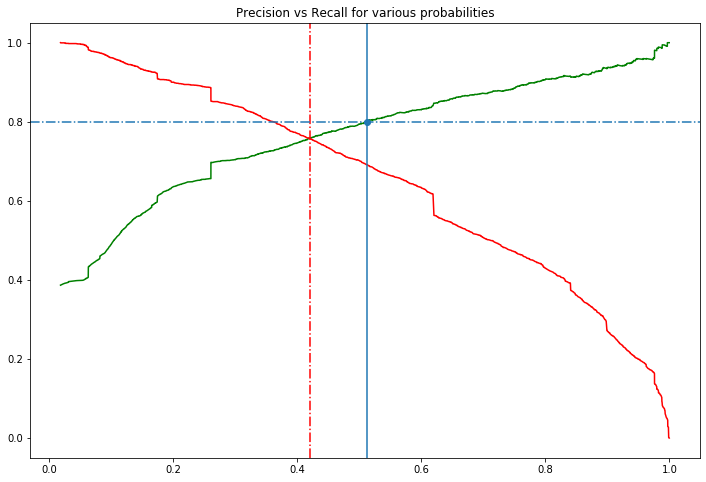

In [141]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.figure(figsize=(12,8))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision vs Recall for various probabilities')
plt.axvline(0.42,linestyle='-.',color='r')  #optimal cutoff as per the curve

plt.plot(np.interp (0.80, p[:-1], thresholds),0.8,'o')  # need to find threshold where precision is 0.8
plt.axhline(0.80,linestyle='-.')
plt.axvline(np.interp (0.80, p[:-1], thresholds))
plt.show()

In [74]:
round(np.interp (0.80, p[:-1], thresholds),3)

0.513

In [75]:
#Lets take cuttoff as 0.51 to get precision value of 0.8
y_train_pred_final['final_predicted_pr'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.513 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr
0,0,0.062603,6623,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.070816,2792,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.098045,6034,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0.374634,9166,0,1,1,1,1,0,0,0,0,0,0,1,0
4,1,0.914224,2705,1,1,1,1,1,1,1,1,1,1,1,1,1


In [76]:
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted_pr )
confusion3

array([[3330,  387],
       [ 693, 1549]], dtype=int64)

In [77]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [78]:
print("Statistics for model at cutoff value for Converted_prob > 0.513")
print("")
# Let's check the overall accuracy.
print('Overall_Accuaracy :{0}'.format(round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_pr),2)))

sensitivity = round(TP / float(TP+FN),2)
# Let's see the sensitivity of our logistic regression model
print('Sensitivity :{0}'.format(sensitivity))

specificity = round(TN / float(TN+FP),2)

# Let us calculate specificity
print('Specificity : {0}'.format(specificity))

# Calculate false postive rate - predicting lead when customer does not convert
print('False positive rate : {0}'.format(round(FP/ float(TN+FP),2)))

precision = round(TP / float(TP+FP),2)
# positive predictive value (Precision)
print ('Precision(Positive predictive Value) : {0}'.format(precision))

# Negative predictive value
print ('Negative predictive Value : {0}'.format(round(TN / float(TN+ FN),2)))

print("")

print("Sensitivity - Specificity : {0} , {1}".format(sensitivity,specificity))

print("Precision - Recall : {0} , {1}".format(precision,sensitivity))

print("F1 score is : {0} ".format(2*(precision*sensitivity)/(precision+sensitivity)))


Statistics for model at cutoff value for Converted_prob > 0.513

Overall_Accuaracy :0.82
Sensitivity :0.69
Specificity : 0.9
False positive rate : 0.1
Precision(Positive predictive Value) : 0.8
Negative predictive Value : 0.83

Sensitivity - Specificity : 0.69 , 0.9
Precision - Recall : 0.8 , 0.69
F1 score is : 0.7409395973154361 


We need positive predictive value or precision at 0.8 which will ensure conversion ratio of 80% and with cutoff for converted prob value as 0.513 is giving us 0.80 precision value. Hence we will go with cutoff of 0.513

## Model Evaluation

In [79]:
X_test[num_columns] = scaler.transform(X_test[num_columns])

In [80]:
X_test = X_test[X_train_sm.columns[1:]]
X_test.head()

,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
4775,0.000000,0,1,0,0,0,0,1,0,0,0,0,0
3474,0.000000,1,0,0,0,0,1,0,0,0,1,0,0
6457,0.266285,0,0,0,0,0,0,1,0,1,0,0,0
8959,0.640845,0,0,0,0,0,0,1,0,1,0,0,0
1055,0.499120,0,0,0,0,0,0,0,0,0,1,0,0


In [81]:
X_test_sm = sm.add_constant(X_test)

### Making predictions on the test set

In [82]:
y_test_pred = res.predict(X_test_sm)

In [83]:
y_test_pred[:10]

4775   0.998446
3474   0.062603
6457   0.848276
8959   0.971246
1055   0.392368
7086   0.062603
5841   0.062603
1284   0.217311
1893   0.120538
7856   0.276427
dtype: float64

In [84]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
4775,0.998446
3474,0.062603
6457,0.848276
8959,0.971246
1055,0.392368


In [85]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [86]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [87]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [88]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [89]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,4775,0.998446
1,0,3474,0.062603
2,0,6457,0.848276
3,1,8959,0.971246
4,1,1055,0.392368


In [90]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Lead Number','Converted','Converted_Prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,4775,1,0.998446
1,3474,0,0.062603
2,6457,0,0.848276
3,8959,1,0.971246
4,1055,1,0.392368


In [91]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.513 else 0)

In [92]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,4775,1,0.998446,1
1,3474,0,0.062603,0
2,6457,0,0.848276,1
3,8959,1,0.971246,1
4,1055,1,0.392368,0


In [93]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1383,  207],
       [ 327,  637]], dtype=int64)

In [94]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [95]:
print("Statistics for model at cutoff value for Converted_prob > 0.513")
print("")
# Let's check the overall accuracy.
print('Overall_Accuaracy :{0}'.format(round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted),2)))

sensitivity = round(TP / float(TP+FN),2)
# Let's see the sensitivity of our logistic regression model
print('Sensitivity :{0}'.format(sensitivity))

specificity = round(TN / float(TN+FP),2)

# Let us calculate specificity
print('Specificity : {0}'.format(specificity))

# Calculate false postive rate - predicting lead when customer does not convert
print('False positive rate : {0}'.format(round(FP/ float(TN+FP),2)))

precision = round(TP / float(TP+FP),2)
# positive predictive value (Precision)
print ('Precision(Positive predictive Value) : {0}'.format(precision))

# Negative predictive value
print ('Negative predictive Value : {0}'.format(round(TN / float(TN+ FN),2)))

print("")

print("Sensitivity - Specificity : {0} , {1}".format(sensitivity,specificity))

print("Precision - Recall : {0} , {1}".format(precision,sensitivity))

print("F1 score is : {0} ".format(2*(precision*sensitivity)/(precision+sensitivity)))

Statistics for model at cutoff value for Converted_prob > 0.513

Overall_Accuaracy :0.79
Sensitivity :0.66
Specificity : 0.87
False positive rate : 0.13
Precision(Positive predictive Value) : 0.75
Negative predictive Value : 0.81

Sensitivity - Specificity : 0.66 , 0.87
Precision - Recall : 0.75 , 0.66
F1 score is : 0.702127659574468 


In [96]:
# Assigning lead score for test set 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob']*100

y_pred_final.sort_values(by = 'Lead_Score',ascending = False).head()

,Lead Number,Converted,Converted_Prob,final_predicted,Lead_Score
2060,7187,1,0.999013,1,99.901340
2178,8120,1,0.999001,1,99.900108
347,1614,1,0.998521,1,99.852070
0,4775,1,0.998446,1,99.844622
1271,4771,1,0.998446,1,99.844622
